<a href="https://colab.research.google.com/github/ChristopherMajor/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Christopher_Major_LS_DS12_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import math

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
#making a simple average function
def average(list):
  return sum(list) / len(list)
average(sales)
    

3052.714285714286

In [0]:
def variance(list):
  mean = average(list)
  n= len(list) -1
  return sum((i-mean) ** 2 for i in list)/n
var = variance(sales)
var

214387.90476190473

In [0]:
def stand_dev(list):
  return (variance(list))**(1/2)

stand_dev(sales)
sales_std = stand_dev(sales)
sales_std

463.0204150595357

In [0]:
def std_var(list):
  return print('Variance', variance(list),
               'Standard Deviation', stand_dev(list))

std_var(sales)
#kaboom baby, bonus points!

Variance 214387.90476190473 Standard Deviation 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers=[127,80,105,92,120,115,93]
sales_cov= pd.DataFrame({'sales': sales, 'customers':customers})
sales_cov.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cust_std = stand_dev(customers)
cust_std

17.057326313123664

In [0]:
corr_coe = 7604.357143/(cust_std*sales_std)
corr_coe

0.962833977832979

In [0]:
sales_cov.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2020-01-29 00:55:05--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.03s   

2020-01-29 00:55:05 (4.05 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [0]:
df = pd.read_csv('titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#new datafram with only numeric values
new_df = df.select_dtypes(include=[np.number])
new_df.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
new_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
new_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

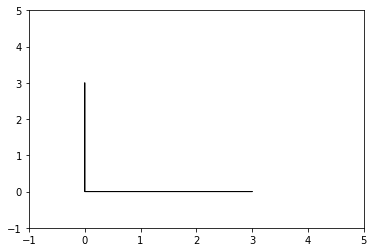

In [2]:
#synonym for orthogonal is perpendicular, or forming a right angle
import matplotlib.pyplot as plt
v1=[0,3]
v2=[3,0]
plt.arrow(0,0,v1[0],v1[1])
plt.arrow(0,0,v2[0],v2[1])
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a= np.array([[-5,3,7]])
b=np.array([[6,-8,2]])

np.dot(a,b.T)
#it wouldn't let me do a and b as is for the np.dot() so i transposed b.
#if .T didn't change the outcome of np.dot then these vectors are not orthogonal
#if np.dot is 0 then they are orthogonal
#edit: after doing the next question i've verified that .T is an acceptable solution
#to the problem. 

array([[-40]])

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c=np.array([[2,-15,6,20]])
print('||c||^2', np.linalg.norm(c)**2)
print('c.c', np.dot(c,c.T))
print('c.T*c',(c.T*c))
#not sure if i'm using the right multiplcation for the c.T*c but the other two are
#equal to each other. 

||c||^2 665.0
c.c [[665]]
c.T*c [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f=np.array([[4,12,11,9,2]])
f_norm =np.linalg.norm(f)
print('f-hat', (f/f_norm))

f-hat [[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

<function matplotlib.pyplot.show>

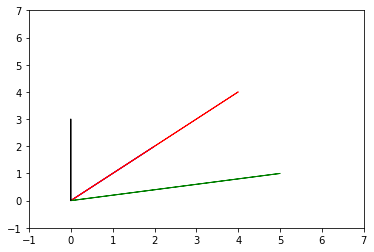

In [10]:
dep_v=[2,2]
dep_v2=np.multiply(dep_v,2)
ind_v=[5,1]
ind_v2=[0,3]

plt.xlim(-1,7)
plt.ylim(-1,7)

plt.arrow(0,0,dep_v[0],dep_v[1], color='blue')
plt.arrow(0,0,dep_v2[0],dep_v2[1], color='red')
plt.arrow(0,0,ind_v[0],ind_v[1],color='green')
plt.arrow(0,0,ind_v2[0],ind_v2[1])

plt.show
#dependent vectors are blue and red. can't see blue line because red is on top of
#It.  the indpependant vectors are green and black. 

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

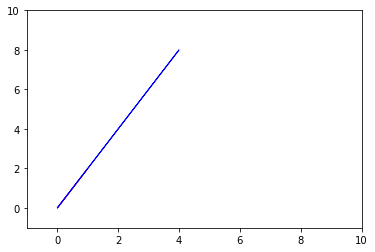

In [15]:
g=[1,2]
h=[4,8]
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.arrow(0,0,g[0],g[1], color='red')
plt.arrow(0,0,h[0],h[1], color='blue')
plt.show()
#i belive the span is only on the line because these are linearly dependant vectors
#span would be notated as R1. 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

3

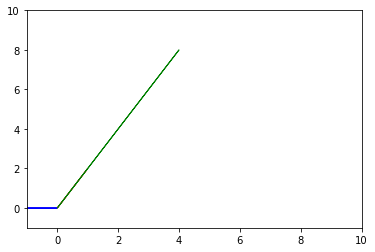

In [31]:
l=[1,2,3]
m=[-1,0,7]
n=[4,8,2]
P=np.matrix([l,m,n])
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.arrow(0,0,l[0],l[1], color='red')
plt.arrow(0,0,m[0],m[1], color='blue')
plt.arrow(0,0,n[0],n[1], color='green')
np.linalg.matrix_rank(P)

#this one i think is R3, no lines are dependant.
#this one spans 3 dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



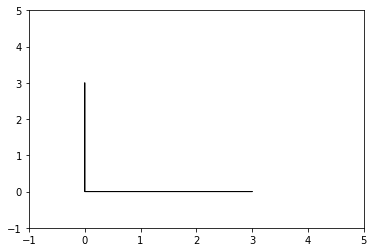

In [32]:
v1=[0,3]
v2=[3,0]
plt.arrow(0,0,v1[0],v1[1])
plt.arrow(0,0,v2[0],v2[1])
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

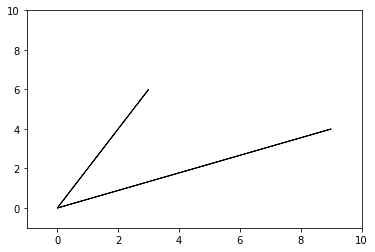

In [33]:
v3=[9,4]
v4=[3,6]
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.arrow(0,0,v3[0],v3[1])
plt.arrow(0,0,v4[0],v4[1])

## 6.2 What does it mean to form a basis?

to form a basis is to determine what type of space the span takes up.  2 dimensional space would be R2, 3d is R3.  if the lines are dependant then it will only fill the space of the line, which is 1d space or R1.  
orthogonal basis means the vectors are othogonal to each other ie. their dot product equals 0.  orthonormal means the vectors are othogonal to each other and are unit vectors.  

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [37]:
P1=np.matrix([[1,2,3],
              [-1,0,7],
              [4,8,2]])
print('Rank of P is:', np.linalg.matrix_rank(P1))

Rank of P is: 3


## 7.2 What does the rank of a matrix tell us?

rank can tell us R value. or how many dimensions the vectors in a matrix will span.  R3 rank means it will span 3 dimensional space. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

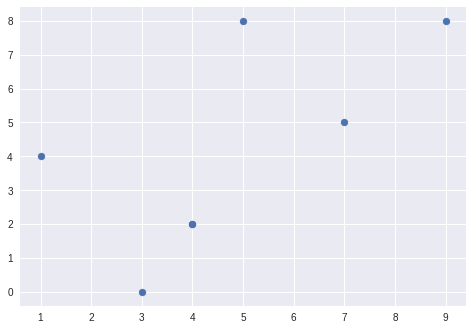

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()